In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:

# df2 = pd.read_csv('Umich_sentiment_analysis_randomized.txt', sep='\t',
#                  names=['sentiment', 'document'])

df = pd.read_csv('nbgrampfizer.csv')

df.head()


,Label,Text,clean_msg,msg_lower,token,spell,filter,msg_stemmed,msg_string,msg_n_gram
0,Negative,"Wiw efek pfizer kok kek gini, jd takut mo vaks...",Wiw efek pfizer kok kek gini jd takut mo vaksi...,wiw efek pfizer kok kek gini jd takut mo vaksi...,"['wiw', 'efek', 'pfizer', 'kok', 'kek', 'gini'...","['wow', 'efek', 'pfizer', 'kok', 'seperti', 'b...","['efek', 'pfizer', 'kok', 'begini', 'jadi', 't...","['efek', 'pfizer', 'kok', 'begini', 'jadi', 't...",efek pfizer kok begini jadi takut mau vaksin tiga,"['efek pfizer kok', 'pfizer kok begini', 'kok ..."
1,Negative,Waktu saya vaksin pfizer yg kedua.. efek vaksi...,Waktu saya vaksin pfizer yg kedua efek vaksin ...,waktu saya vaksin pfizer yg kedua efek vaksin ...,"['waktu', 'saya', 'vaksin', 'pfizer', 'yg', 'k...","['waktu', 'saya', 'vaksin', 'pfizer', 'yang', ...","['waktu', 'vaksin', 'pfizer', 'kedua', 'efek',...","['waktu', 'vaksin', 'pfizer', 'dua', 'efek', '...",waktu vaksin pfizer dua efek vaksin lumayan pa...,"['waktu vaksin pfizer', 'vaksin pfizer dua', '..."
2,Negative,vaksin booster kali ini bikin pingsan. vaksin ...,vaksin booster kali ini bikin pingsan vaksin p...,vaksin booster kali ini bikin pingsan vaksin p...,"['vaksin', 'booster', 'kali', 'ini', 'bikin', ...","['vaksin', 'booster', 'kali', 'ini', 'buat', '...","['vaksin', 'booster', 'kali', 'buat', 'pingsan...","['vaksin', 'booster', 'kali', 'buat', 'pingsan...",vaksin booster kali buat pingsan vaksin pakai ...,"['vaksin booster kali', 'booster kali buat', '..."
3,Negative,"Vaksin Sinovac : Ngantukkk, Vaksin Sinovac : e...",Vaksin Sinovac Ngantukkk Vaksin Sinovac engg...,vaksin sinovac ngantukkk vaksin sinovac engg...,"['vaksin', 'sinovac', 'ngantukkk', 'vaksin', '...","['vaksin', 'sinovac', 'mengantuk', 'vaksin', '...","['vaksin', 'sinovac', 'mengantuk', 'vaksin', '...","['vaksin', 'sinovac', 'antuk', 'vaksin', 'sino...",vaksin sinovac antuk vaksin sinovac efek vaksi...,"['vaksin sinovac antuk', 'sinovac antuk vaksin..."
4,Negative,"tadi pagi vaksin booster pfizer, efek pertama ...",tadi pagi vaksin booster pfizer efek pertama p...,tadi pagi vaksin booster pfizer efek pertama p...,"['tadi', 'pagi', 'vaksin', 'booster', 'pfizer'...","['tadi', 'pagi', 'vaksin', 'booster', 'pfizer'...","['tadi', 'pagi', 'vaksin', 'booster', 'pfizer'...","['tadi', 'pagi', 'vaksin', 'booster', 'pfizer'...",tadi pagi vaksin booster pfizer efek pertama p...,"['tadi pagi vaksin', 'pagi vaksin booster', 'v..."


In [31]:
df['Label'].replace(to_replace='Negative', value=0, inplace=True)
df['Label'].replace(to_replace='Positive', value=1, inplace=True)

length = len(df)  # length of the datframe
pos_count = len(df[df['Label'] == 1])  # positive_sentiment count
neg_count = len(df[df['Label'] == 0])  # negative_sentiment count
print (
    'length=',
    length,
    '\npos_count',
    pos_count,
    '\nneg_count',
    neg_count,
    )

length= 160 
pos_count 80 
neg_count 80


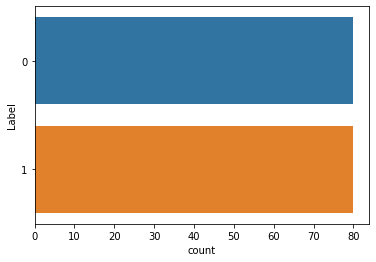

In [32]:
sns.countplot(y="Label",data=df)#plotting the data
plt.show()

In [33]:
 !pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
def sentence_to_words(sentence):

    l = sentence.lower()  # convert sentence to lowercase
    l = l.split(' ')  # split sentence into individual word
    p = ''
    word_list = []

    for word in l:

        p = ''

        for letter in word:

            if ord(letter) >= 67 and ord(letter) <= 122:
                p = p + letter
        word_list.append(p)

    return word_list  # return the word list of the sentence devoid of special characters and numericals


def naive_bayes_train(X, Y, a=0.000001):
    n_length = len(X)
    n_class_pos = len(Y[Y == 1])
    n_class_neg = len(Y[Y == 0])
    prior_pos = n_class_pos / n_length  # prior probability for  class
    prior_neg = n_class_neg / n_length  #prior probability for class 
    (n, p, bag) = bag_of_words_maker(X, Y)

    pr = {}

    for i in range(len(bag)):   #evaluating the likelihood prob for each word given a class
        p_pos = (bag['count_pos'][i] + a) / (p + len(bag) * a)

        p_neg = (bag['count_neg'][i] + a) / (n + len(bag) * a)

        pr[bag['index'][i]] = [p_pos, p_neg]
    pr = pd.DataFrame(pr).T
    pr.columns = ['sent=positive', 'sent=negative']
    pr = pr.reset_index()

    return (prior_pos, prior_neg, pr)


def naive_bayes_predict(
    X,
    pr,
    prior_pos,
    prior_neg,
    ):
    Y = []

    for i in range(len(X)):
        k_pos = 1
        k_neg = 1
        p = sentence_to_words(X[i])

        for k in range(len(pr)):

            for word in p:

                if word == pr['index'][k]:
                    k_pos = k_pos * pr['sent=positive'][k] #pdt of likelihood prob given the word is present in vocabulary 
                    k_neg = k_neg * pr['sent=negative'][k]

        nb = [prior_neg * k_neg, prior_pos * k_pos] # multiply each likelihood prob with the prior prob
        Y.append(np.argmax(nb))

    return Y

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()

more_stopword = ['ibu','ayah','adik','kakak','nya','yah','sih','oke','kak','deh','mah','an','ku','mu','iya','apa', 
                 'gapapa','akupun','apapun','eh','kah','mengada','apanya','tante','mas','suami','si','mama','bapak',
                 'nder','budhe','kakek','nenek','mbah','wow','kok']

custom_stopword = stop_factory.get_stop_words() + more_stopword

stopword = stop_factory.create_stop_word_remover()

def bag_of_words_maker(X, Y):

    bag_dict_binary_NB_pos = {} #keeping track of the positive class words
    bag_dict_binary_NB_neg = {} #keeping track of the negative class words

    stop_words = custom_stopword
    
    for i in range(len(X)):
        p = sentence_to_words(X[i])
        sent = Y[i]
        x_pos = {}
        x_neg = {} #we intialize the dict every iteration so that it does not consider repititions .(Binary NB)

        # print(p)

        if sent == 1:
            for word in p:

                if word in x_pos.keys():
                    x_pos[word] = [x_pos[word][0] + 1, x_pos[word][1]]  #word is the key and value stored is [count, sentiment]
                else:
                    x_pos[word] = [1, sent]

            for key in x_pos.keys():

                if key in bag_dict_binary_NB_pos.keys():
                    bag_dict_binary_NB_pos[key] = \
                        [bag_dict_binary_NB_pos[key][0] + 1,
                         bag_dict_binary_NB_pos[key][1]]
                else:

                    bag_dict_binary_NB_pos[key] = [1, sent]  #storing it in the final dict 

        if sent == 0:

            for word in p:
                if word in x_neg.keys():
                    x_neg[word] = [x_neg[word][0] + 1, x_neg[word][1]]
                else:
                    x_neg[word] = [1, sent]
            for key in x_neg.keys():
                if key in bag_dict_binary_NB_neg.keys():
                    bag_dict_binary_NB_neg[key] = \
                        [bag_dict_binary_NB_neg[key][0] + 1,
                         bag_dict_binary_NB_neg[key][1]]
                else:

                    bag_dict_binary_NB_neg[key] = [1, sent]

    # print(bag_dict_multi.keys())
    # returns the dataframe containg word count in each sentiment 
    neg_bag = pd.DataFrame(bag_dict_binary_NB_neg).T
    pos_bag = pd.DataFrame(bag_dict_binary_NB_pos).T

    neg_bag.columns = ['count_neg', 'sentiment_neg']
    pos_bag.columns = ['count_pos', 'sentiment_pos']
    
    try:
      neg_bag = neg_bag.drop(stop_words)
      pos_bag = pos_bag.drop(stop_words)
    except:
      print('None')
    
    neg_bag = neg_bag.reset_index()
    pos_bag = pos_bag.reset_index()
    n = len(neg_bag)
    p = len(pos_bag)
    bag_of_words = pd.merge(neg_bag, pos_bag, on=['index'], how='outer')
    bag_of_words['count_neg'] = bag_of_words['count_neg'].fillna(0)
    bag_of_words['count_pos'] = bag_of_words['count_pos'].fillna(0)
    bag_of_words['sentiment_neg'] = bag_of_words['sentiment_neg'
            ].fillna(0)
    bag_of_words['sentiment_pos'] = bag_of_words['sentiment_pos'
            ].fillna(1)

    return (n, p, bag_of_words)

In [35]:
x = df['msg_n_gram']
y = df['Label']
(n, p, bag_of_words) = bag_of_words_maker(x, y)
print (n, ' ', p)
bag_of_words.head(5)

None
365   381


,index,count_neg,sentiment_neg,count_pos,sentiment_pos
0,[efek,28.0,0.0,11.0,1.0
1,pfizer,58.0,0.0,62.0,1.0
2,kok,1.0,0.0,3.0,1.0
3,begini,2.0,0.0,1.0,1.0
4,jadi,6.0,0.0,5.0,1.0


In [36]:
prior_pos,prior_neg,table = naive_bayes_train(x,y)
table.head(5)

None


,index,sent=positive,sent=negative
0,[efek,0.028871,0.076712
1,pfizer,0.162729,0.158904
2,kok,0.007874,0.002740
3,begini,0.002625,0.005479
4,jadi,0.013123,0.016438


In [37]:
from sklearn.model_selection import train_test_split

X = df["msg_n_gram"]
Y = df["Label"]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state = 3)

x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
a,b,bag = naive_bayes_train(x_train,y_train)
y_predicted = naive_bayes_predict(x_test,bag,a,b)
y_predicted

pd.DataFrame(y_predicted).to_csv('labelNB.csv', header  = ['labelNB'],index=False)  

None


In [42]:
# aa = pd.read_csv("nbgrampfizer.csv")
# bb = pd.read_csv("labelNB.csv")
# bb = bb.dropna(axis=1)
# merged = aa.merge(bb, on='labelNB')
# merged.to_csv("output.csv", index=False)

df1 = pd.read_csv('nbgrampfizer.csv')
df2 = pd.read_csv('labelNB.csv')

result = pd.concat([df1, df2], axis=1, join='inner')
result.to_csv('datasetwithLabelNB.csv', index=False)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
print ('Accuracy=', accuracy_score(y_test, np.array(y_predicted)))

(tn, fp, fn, tp) = confusion_matrix(y_test, np.array(y_predicted)).ravel()

print ('precsion=', tp / (tp + fp))
print ('recall=', tp / (tp + fn))
print ('f-measure=', 2 * ((tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn))))

Accuracy= 0.5625
precsion= 0.48484848484848486
recall= 0.8
f-measure= 0.6037735849056605
